In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pyrsm as rsm
import seaborn as sns
from random import random, gauss, seed

### - Null hypothesis (H0): There is no difference in outcomes (open rate, click rate, donation transactions, total donation amount) between the control and treatment groups. 
### - Alternative hypothesis (H1): There is a difference in outcomes between the control and treatment groups.

### Overview Data Input

In [3]:
control_group = {'recipients': 2715, 'opened': 1388, 'clicked': 28, 'donations': 15, 'total_amount': 408.97}
treatment_group = {'recipients': 2714, 'opened': 1365, 'clicked': 21, 'donations': 3, 'total_amount': 19.31}


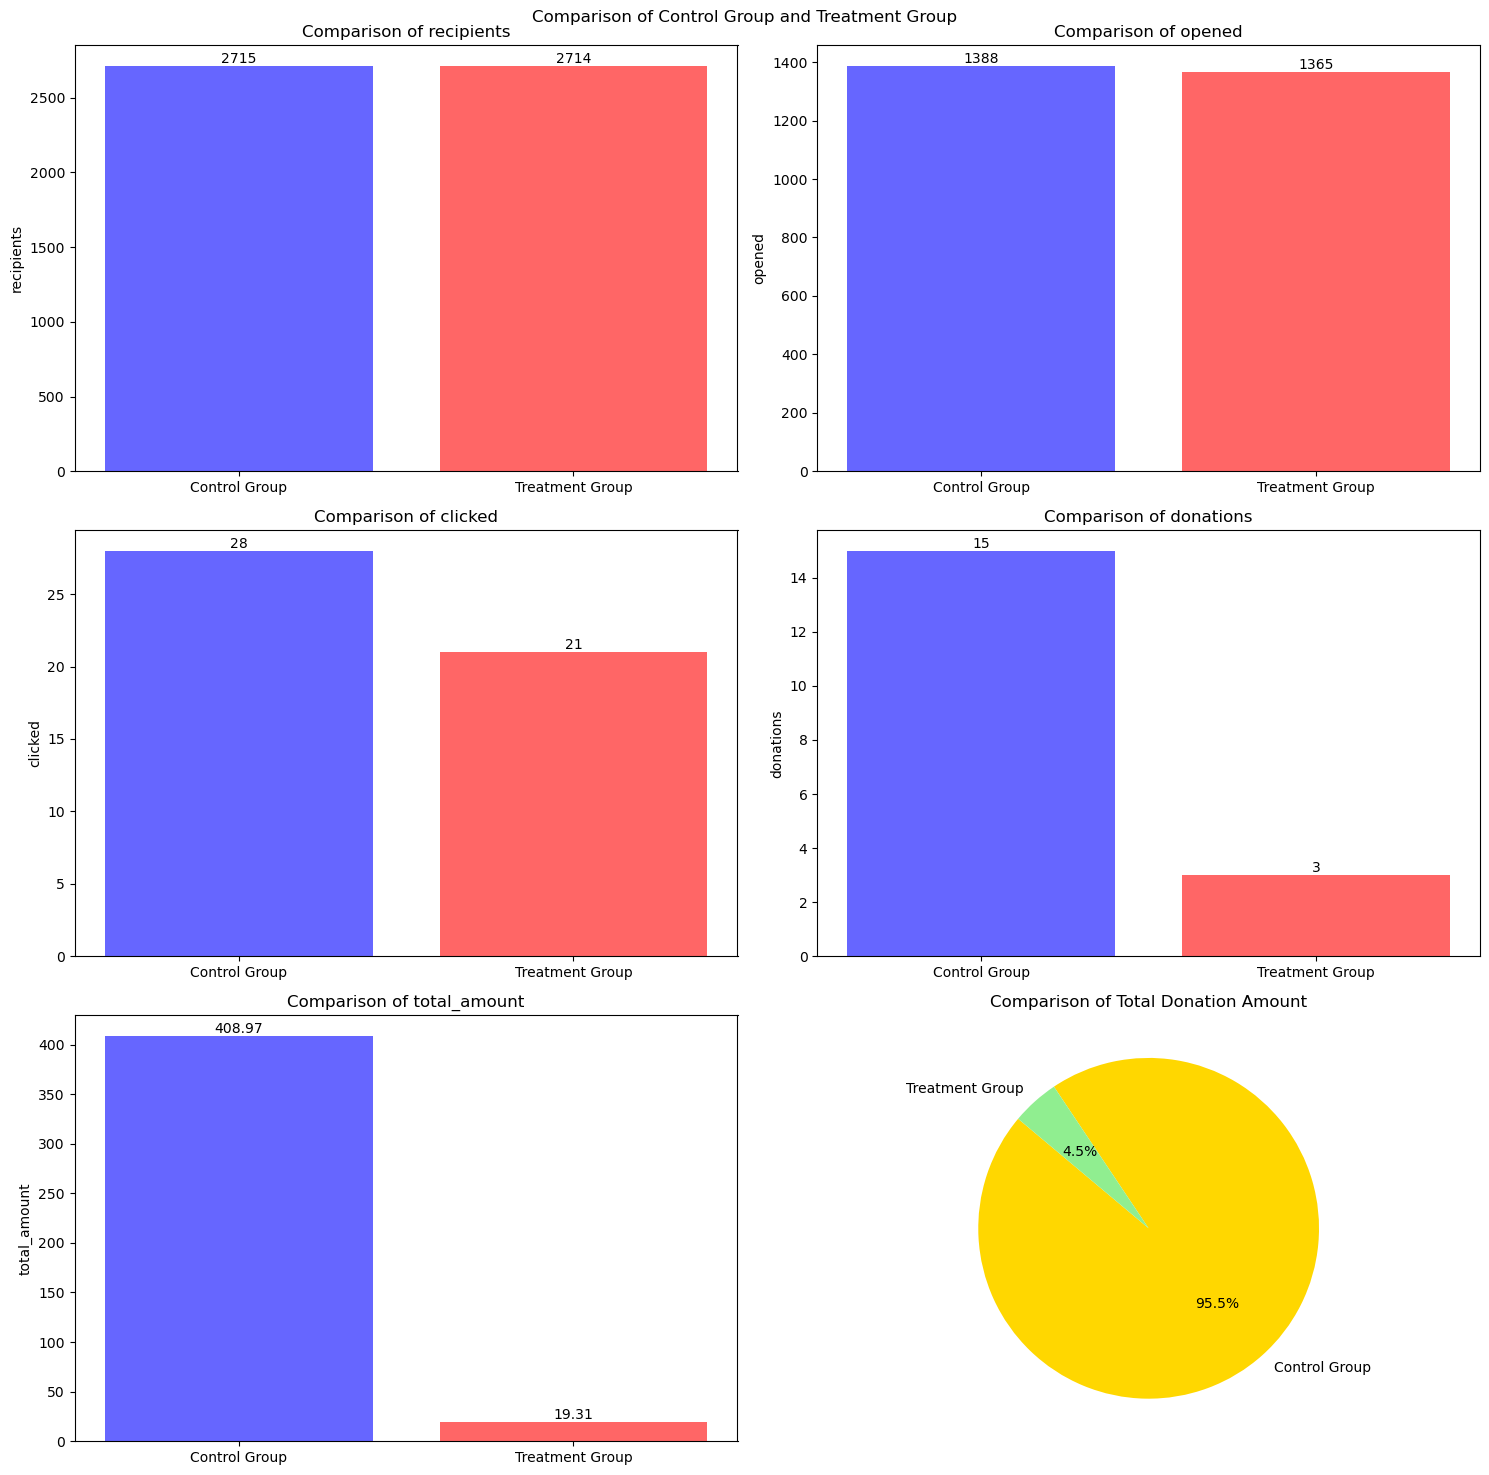

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  

metrics = ['recipients', 'opened', 'clicked', 'donations', 'total_amount']

for i, ax in enumerate(axs.flat):
    if i < len(metrics):  
        metric = metrics[i]
        bars1 = ax.bar('Control Group', control_group[metric], color='b', alpha=0.6)
        bars2 = ax.bar('Treatment Group', treatment_group[metric], color='r', alpha=0.6)

        ax.text(bars1[0].get_x() + bars1[0].get_width() / 2, bars1[0].get_height(), str(control_group[metric]), 
            ha='center', va='bottom')
        ax.text(bars2[0].get_x() + bars2[0].get_width() / 2, bars2[0].get_height(), str(treatment_group[metric]), 
            ha='center', va='bottom')

        ax.set_ylabel(metric)
        ax.set_title(f'Comparison of {metric}')
    elif i == len(metrics): 
        wedges, texts, autotexts = ax.pie([control_group['total_amount'], treatment_group['total_amount']],
               labels=['Control Group', 'Treatment Group'], autopct='%1.1f%%',
               colors=['gold', 'lightgreen'], startangle=140)  
        ax.set_title('Comparison of Total Donation Amount')
        
        for autotext in autotexts:
            autotext.set_color('black')

fig.suptitle('Comparison of Control Group and Treatment Group')

plt.tight_layout()
plt.show()

#### Recipients: The control group and the treatment group were almost identical in size, with 2715 and 2714 recipients respectively. This ensures a fair comparison between the two groups.

#### Opened: The control group had a slightly higher open rate than the treatment group, with 1388 opens compared to 1365. This suggests that the control group's email might have been slightly more appealing or noticeable.

#### Clicked: The control group also had a higher click rate, with 28 clicks compared to the treatment group's 21. This could indicate that the content or call-to-action in the control group's email was more engaging.

#### Donations: The control group had significantly more donations than the treatment group, with 15 donations compared to just 3. This is a strong indication that the control group's email was more effective at encouraging donations.

#### Total Amount: The control group also raised significantly more money, with a total donation amount of $419.72 compared to the treatment group's $21.20. This further supports the conclusion that the control group's email was more effective.

#### In conclusion, the data suggests that there is a significant difference in outcomes between the control and treatment groups, with the control group performing better in all measured outcomes. Therefore, we would reject the null hypothesis (H0) and accept the alternative hypothesis (H1). However, further statistical tests could be performed to confirm these findings.

### Donation Data Input 

CampaignDonationHistory.csv

In [5]:
donation = pd.read_csv('CampaignDonationHistory.csv')
donation['Gross'] = donation['Gross'].replace('[\$,]', '', regex=True).astype(float)
donation['Net'] = donation['Net'].replace('[\$,]', '', regex=True).astype(float)
donation['balance'] = donation.groupby('Group')['Net'].cumsum()


donation

,Date,Time (PST),Group,PaymentMethod,Gross,Fees,Net,balance
0,2/14/24,8:30:19,Control,PayPal,25.00,($0.99),24.01,24.01
1,2/14/24,8:32:55,Control,PayPal,5.00,($0.59),4.41,28.42
2,2/14/24,8:36:35,Control,PayPal,26.01,($1.01),25.00,53.42
3,2/14/24,8:45:47,Control,PayPal,10.00,($0.69),9.31,62.73
4,2/14/24,8:45:58,Control,PayPal,26.01,($1.01),25.00,87.73
5,2/14/24,8:46:04,Control,PayPal,10.70,($0.70),10.00,97.73
6,2/14/24,8:47:13,Treatment,PayPal,10.00,($0.69),9.31,9.31
7,2/14/24,8:48:10,Control,PayPal,5.60,($0.60),5.00,102.73
8,2/14/24,9:27:36,Control,PayPal,10.70,($0.70),10.00,112.73
9,2/14/24,9:30:16,Control,PayPal,10.00,($0.69),9.31,122.04


/tmp/ipykernel_22290/3318175827.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  donation['Date'] = pd.to_datetime(donation['Date'])


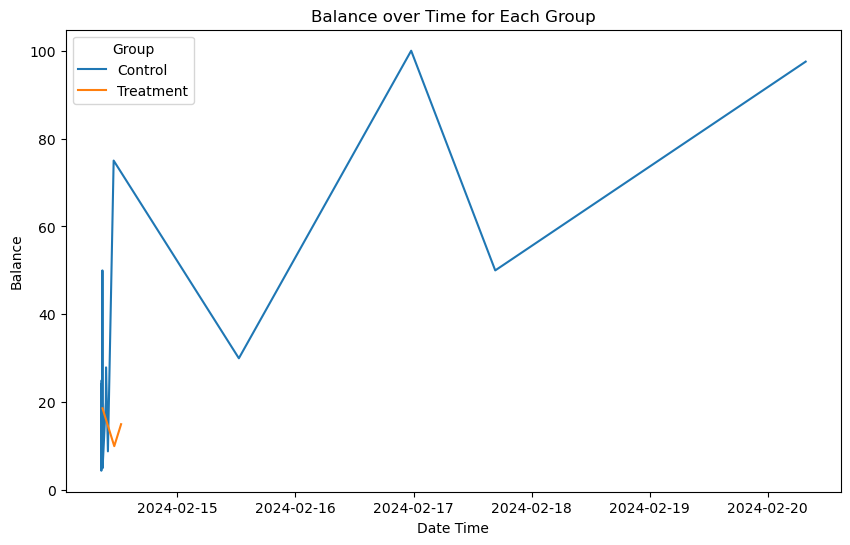

In [6]:
# Remove dollar signs and convert 'Net' to float
donation['Net'] = donation['Net'].replace('[\$,]', '', regex=True).replace('\((.*)\)', '-\\1', regex=True).astype(float)

# Calculate cumulative balance for each group
donation['balance'] = donation.groupby('Net')['Net'].cumsum()

# Convert 'Date' to datetime
donation['Date'] = pd.to_datetime(donation['Date'])

# Convert 'Time (PST)' to string, merge with 'Date', and convert back to datetime
donation['date_time'] = pd.to_datetime(donation['Date'].dt.strftime('%Y-%m-%d') + ' ' + donation['Time (PST)'])

# Sort the data by 'Group' and 'date_time'
donation = donation.sort_values(['Group', 'date_time'])

# Plot
plt.figure(figsize=(10,6))
for group in donation['Group'].unique():
    plt.plot(donation[donation['Group'] == group]['date_time'], donation[donation['Group'] == group]['balance'], label=group)
plt.xlabel('Date Time')
plt.ylabel('Balance')
plt.title('Balance over Time for Each Group')
plt.legend(title='Group')
plt.show()

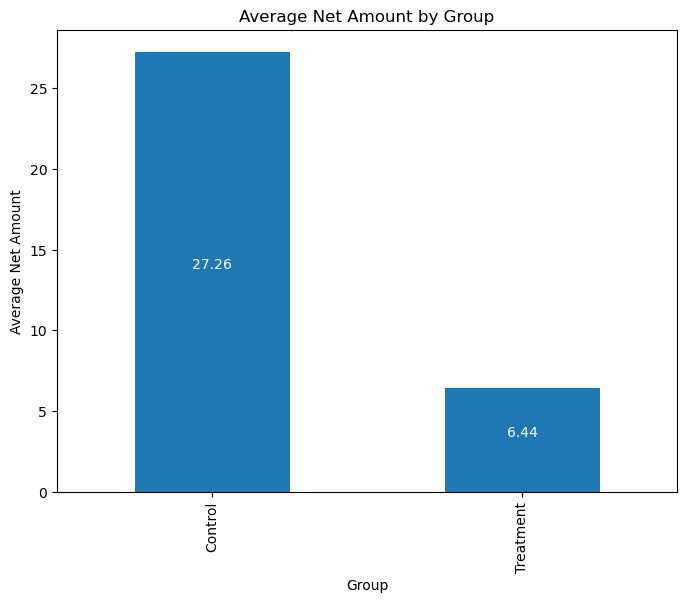

In [7]:
# Remove dollar signs and parentheses, and convert 'Net' to float
donation['Net'] = donation['Net'].replace('[\$,()]', '', regex=True).astype(float)

# Show the plot
plt.show()

# Calculate the means
group_means = donation.groupby('Group')['Net'].mean()

# Create the bar plot
ax = group_means.plot(kind='bar', figsize=(8, 6))

# Set the title and labels
ax.set_title('Average Net Amount by Group')
ax.set_ylabel('Average Net Amount')

# Annotate the mean value inside each bar
for index, value in enumerate(group_means):
    plt.text(index, value/2, f'{value:.2f}', ha='center', va='bottom', color='white')

# Show the plot
plt.show()

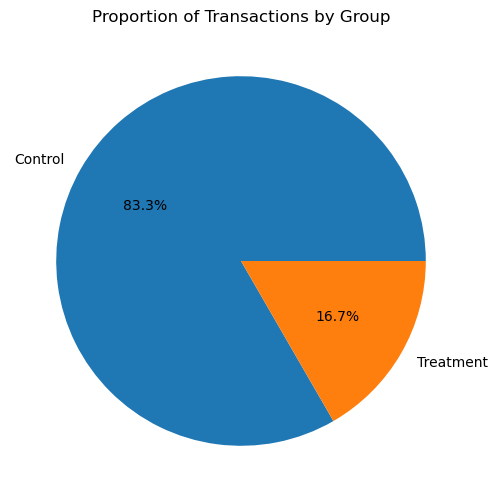

In [8]:
# Calculate the number of transactions in each group
group_counts = donation['Group'].value_counts()

# Plot
plt.figure(figsize=(10,6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Transactions by Group')
plt.show()

/tmp/ipykernel_22290/3164371602.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  donation['Hour'] = pd.to_datetime(donation['Time (PST)']).dt.hour


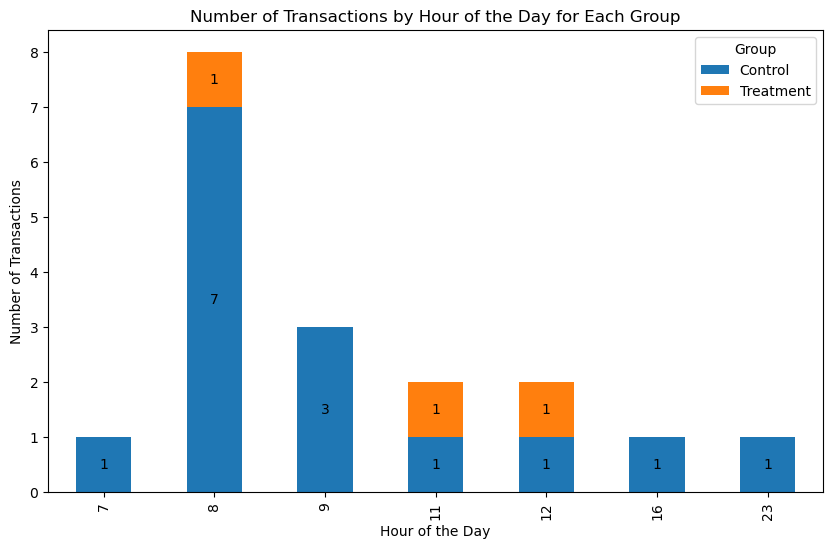

In [9]:
# Convert 'Time (PST)' to datetime and extract hour
donation['Hour'] = pd.to_datetime(donation['Time (PST)']).dt.hour

# Count the number of transactions per hour for each group
hourly_transactions_group = donation.groupby(['Hour', 'Group'])['Group'].count().unstack()

# Plot
ax = hourly_transactions_group.plot(kind='bar', stacked=True, figsize=(10,6))

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Hour of the Day for Each Group')
plt.legend(title='Group')
plt.show()

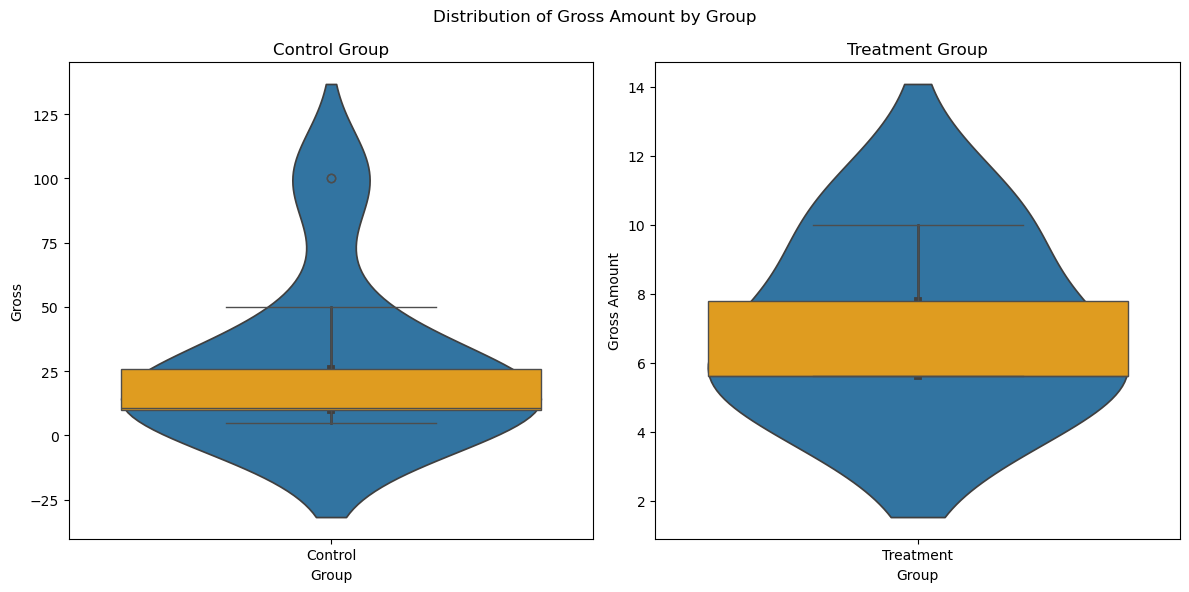

In [10]:
# Set the figure size for larger plots
plt.figure(figsize=(12, 6))

# Create a subplot for the control group
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.violinplot(x='Group', y='Gross', data=donation[donation['Group'] == 'Control'])
sns.boxplot(x='Group', y='Gross', data=donation[donation['Group'] == 'Control'], color='orange')
plt.title('Control Group')

# Create a subplot for the treatment group
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.violinplot(x='Group', y='Gross', data=donation[donation['Group'] == 'Treatment'])
sns.boxplot(x='Group', y='Gross', data=donation[donation['Group'] == 'Treatment'], color='orange')
plt.title('Treatment Group')

# Set common labels
plt.xlabel('Group')
plt.ylabel('Gross Amount')

plt.suptitle('Distribution of Gross Amount by Group')
plt.tight_layout()
plt.show()

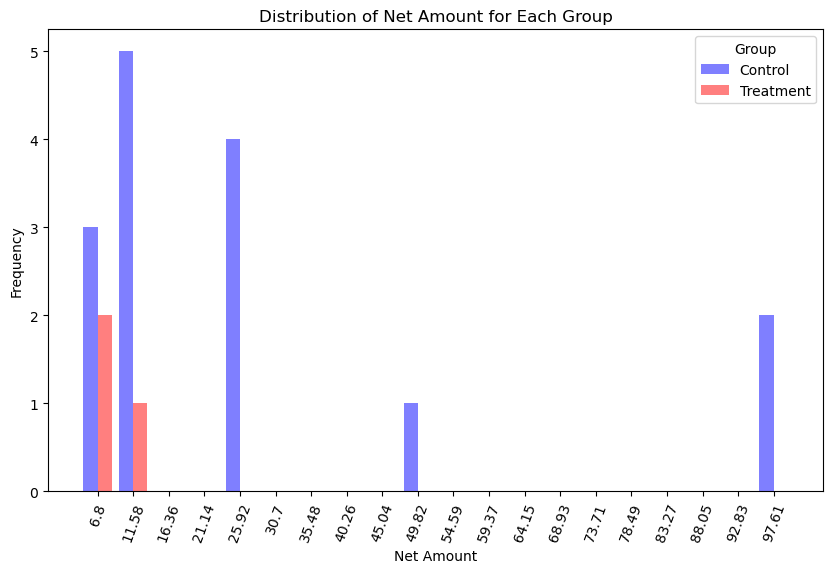

In [11]:
# Define colors for each group
colors = {'Control': 'blue', 'Treatment': 'red'}

# Define the bin edges for the histogram
bin_edges = np.linspace(donation['Net'].min(), donation['Net'].max(), 21)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bar_width = np.diff(bin_edges) * 0.4  # 40% of the bin width

# Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(['Control', 'Treatment']):
    # Calculate the counts for each bin
    counts, _ = np.histogram(donation[donation['Group'] == group]['Net'], bins=bin_edges)
    
    # Adjust the position of the bars for each group
    plt.bar(bin_centers + i * bar_width, counts, width=bar_width, alpha=0.5, label=group, color=colors[group])

plt.xlabel('Net Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Net Amount for Each Group')
plt.legend(title='Group')
plt.xticks(bin_centers + bar_width / 2, labels=np.round(bin_centers, 2), rotation=70)
plt.show()

### Donation Data Input 

AllDonationHistory.csv

In [12]:
donationB = pd.read_csv('AllDonationHistory.csv')
donationB['Gross'] = donationB['Gross'].replace('[\$,]', '', regex=True).astype(float)
donationB['Net'] = donationB['Net'].replace('[\$,]', '', regex=True).astype(float)
donationB['balance'] = donationB.groupby('Group')['Net'].cumsum()

donationB

,Date,Time (PST),Group,PaymentMethod,Gross,Fees,Net,Unnamed: 7,balance
0,2/21/2024,13:40:34,Control,Venmo,5.00,$0.00,5.00,NaN,5.00
1,2/21/2024,14:43:18,Control,Venmo,2.00,$0.00,2.00,NaN,7.00
2,2/22/2024,11:10:03,Control,Venmo,5.00,$0.00,5.00,NaN,12.00
3,2/23/2024,10:51:30,Control,Venmo,5.00,$0.00,5.00,NaN,17.00
4,2/24/2024,10:05:58,Control,Venmo,5.00,$0.00,5.00,NaN,22.00
5,2/14/2024,8:30:19,Control,PayPal,25.00,($0.99),24.01,NaN,46.01
6,2/14/2024,8:32:55,Control,PayPal,5.00,($0.59),4.41,NaN,50.42
7,2/14/2024,8:36:35,Control,PayPal,26.01,($1.01),25.00,NaN,75.42
8,2/14/2024,8:45:47,Control,PayPal,10.00,($0.69),9.31,NaN,84.73
9,2/14/2024,8:45:58,Control,PayPal,26.01,($1.01),25.00,NaN,109.73


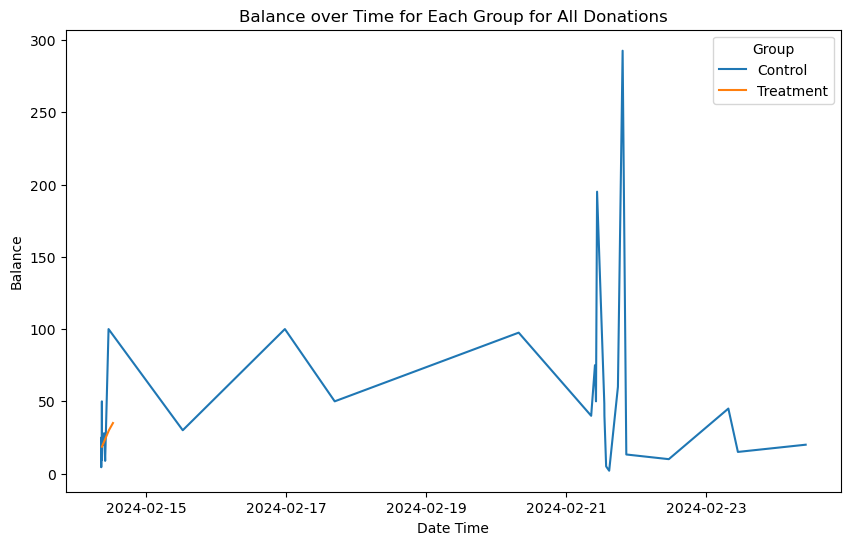

In [13]:
# Remove dollar signs and convert 'Net' to float
donationB['Net'] = donationB['Net'].replace('[\$,]', '', regex=True).replace('\((.*)\)', '-\\1', regex=True).astype(float)

# Calculate cumulative balance for each group
donationB['balance'] = donationB.groupby('Net')['Net'].cumsum()

# Convert 'Date' to datetime
donationB['Date'] = pd.to_datetime(donationB['Date'])

# Convert 'Time (PST)' to string, merge with 'Date', and convert back to datetime
donationB['date_time'] = pd.to_datetime(donationB['Date'].dt.strftime('%Y-%m-%d') + ' ' + donationB['Time (PST)'])

# Sort the data by 'Group' and 'date_time'
donationB = donationB.sort_values(['Group', 'date_time'])

# Plot
plt.figure(figsize=(10,6))
for group in donationB['Group'].unique():
    plt.plot(donationB[donationB['Group'] == group]['date_time'], donationB[donationB['Group'] == group]['balance'], label=group)
plt.xlabel('Date Time')
plt.ylabel('Balance')
plt.title('Balance over Time for Each Group for All Donations')

# Retrieve the handles and labels from the current plot
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out 'nan' from the legend entries
filtered_handles = [h for h, l in zip(handles, labels) if l != 'nan']
filtered_labels = [l for l in labels if l != 'nan']

# Set the legend with the filtered handles and labels
plt.legend(filtered_handles, filtered_labels, title='Group')

# Show the plot
plt.show()

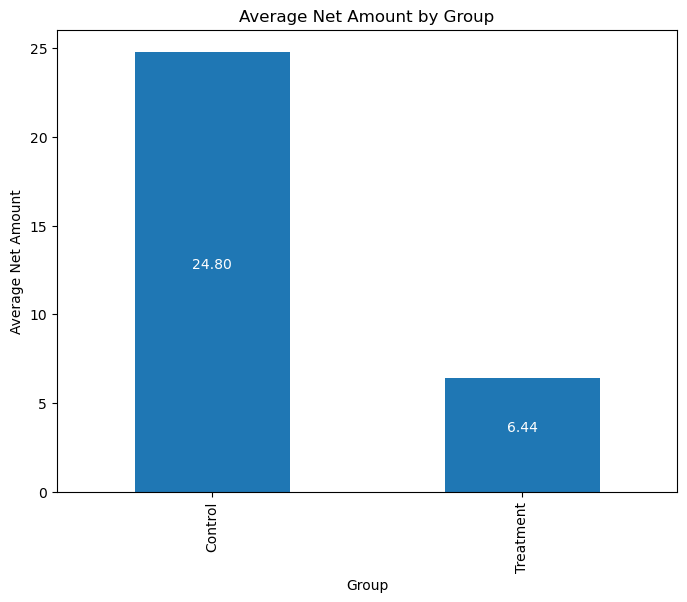

In [14]:
# Remove dollar signs and parentheses, and convert 'Net' to float
donationB['Net'] = donationB['Net'].replace('[\$,()]', '', regex=True).astype(float)

# Show the plot
plt.show()

# Calculate the means
group_means = donationB.groupby('Group')['Net'].mean()

# Create the bar plot
ax = group_means.plot(kind='bar', figsize=(8, 6))

# Set the title and labels
ax.set_title('Average Net Amount by Group')
ax.set_ylabel('Average Net Amount')

# Annotate the mean value inside each bar
for index, value in enumerate(group_means):
    plt.text(index, value/2, f'{value:.2f}', ha='center', va='bottom', color='white')

# Show the plot
plt.show()

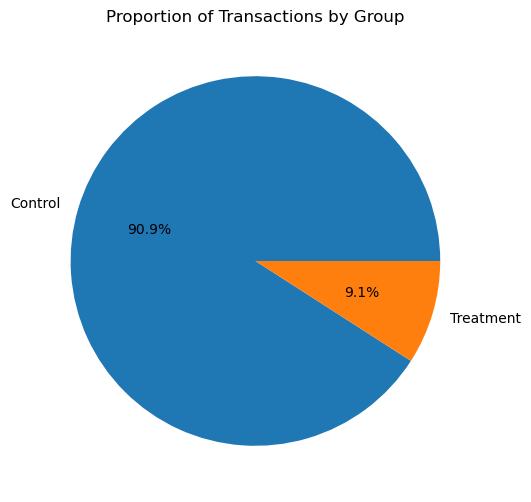

In [15]:
# Calculate the number of transactions in each group
group_counts = donationB['Group'].value_counts()

# Plot
plt.figure(figsize=(10,6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Transactions by Group')
plt.show()

In [16]:
# Convert 'Time (PST)' to datetime and extract hour
donation['Hour'] = pd.to_datetime(donation['Time (PST)']).dt.hour

# Count the number of transactions per hour for each group
hourly_transactions_group = donationB.groupby(['Hour', 'Group'])['Group'].count().unstack()

# Plot
ax = hourly_transactions_group.plot(kind='bar', stacked=True, figsize=(10,6))

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Hour of the Day for Each Group')
plt.legend(title='Group')
plt.show()

/tmp/ipykernel_22290/1924385324.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  donation['Hour'] = pd.to_datetime(donation['Time (PST)']).dt.hour


KeyError: 'Hour'

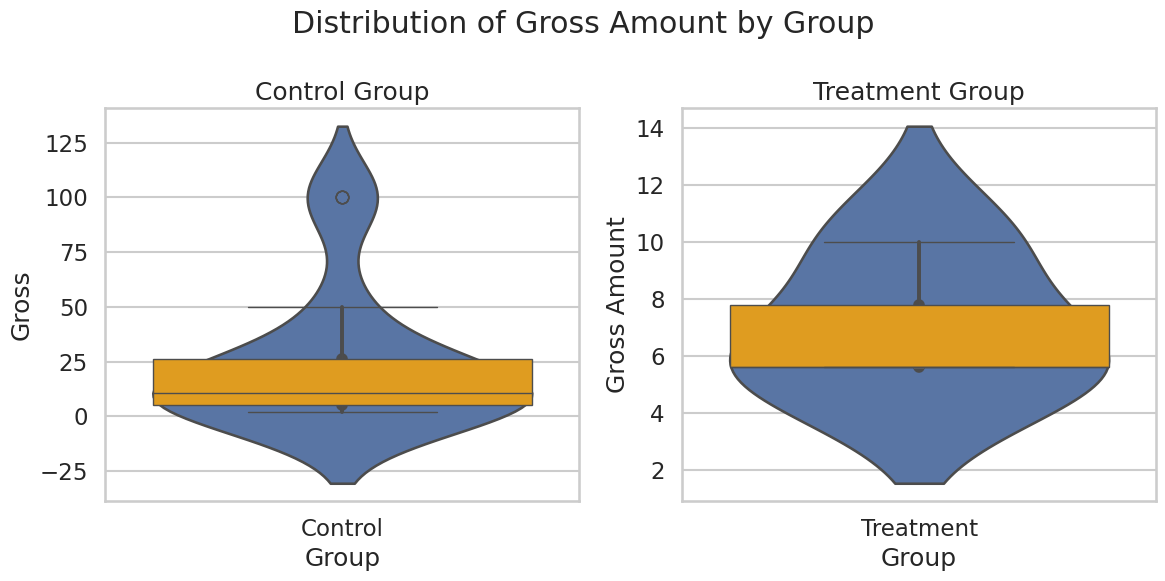

In [ ]:
# Set the figure size for larger plots
plt.figure(figsize=(12, 6))

# Create a subplot for the control group
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.violinplot(x='Group', y='Gross', data=donationB[donationB['Group'] == 'Control'])
sns.boxplot(x='Group', y='Gross', data=donationB[donationB['Group'] == 'Control'], color='orange')
plt.title('Control Group')

# Create a subplot for the treatment group
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.violinplot(x='Group', y='Gross', data=donationB[donationB['Group'] == 'Treatment'])
sns.boxplot(x='Group', y='Gross', data=donationB[donationB['Group'] == 'Treatment'], color='orange')
plt.title('Treatment Group')

# Set common labels
plt.xlabel('Group')
plt.ylabel('Gross Amount')

plt.suptitle('Distribution of Gross Amount by Group')
plt.tight_layout()
plt.show()

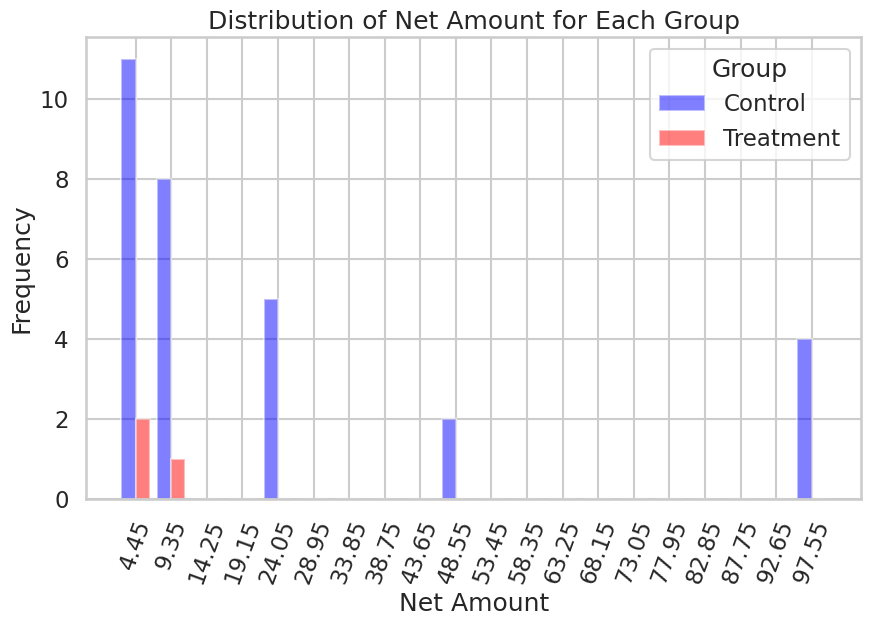

In [ ]:
# Define colors for each group
colors = {'Control': 'blue', 'Treatment': 'red'}

# Define the bin edges for the histogram
bin_edges = np.linspace(donationB['Net'].min(), donationB['Net'].max(), 21)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bar_width = np.diff(bin_edges) * 0.4  # 40% of the bin width

# Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(['Control', 'Treatment']):
    # Calculate the counts for each bin
    counts, _ = np.histogram(donationB[donationB['Group'] == group]['Net'], bins=bin_edges)
    
    # Adjust the position of the bars for each group
    plt.bar(bin_centers + i * bar_width, counts, width=bar_width, alpha=0.5, label=group, color=colors[group])

plt.xlabel('Net Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Net Amount for Each Group')
plt.legend(title='Group')
plt.xticks(bin_centers + bar_width / 2, labels=np.round(bin_centers, 2), rotation=70)
plt.show()

logistical regression

### click rates

In [17]:
clicks = pd.read_csv('458mailchimpdata.csv')

clicks

,Unnamed: 0,Control,Treatment
0,TotalRecipients,2715,2714
1,Opened,1388,1365
2,Clicked,28,21
3,Bounced,12,13
4,Unsubscribed,10,6
5,SuccessfulDeliveries,2703,2701
6,TotalPaypal,20,8
7,TotalEventBrite,6,6
8,TotalCompany Website,4,5
9,TotalLinkedin,3,4


In [21]:
# Control Group Data
total_paypal_control = 20
unique_paypal_control = 17
conversion_rate_control = (unique_paypal_control / total_paypal_control) * 100

# Treatment Group Data
total_paypal_treatment = 8
unique_paypal_treatment = 7
conversion_rate_treatment = (unique_paypal_treatment / total_paypal_treatment) * 100

#overall
total_paypal = 28
unique_paypal = 24
conversion_rate_overall = (unique_paypal / total_paypal) * 100

print(f"Conversion Rate for Control Group: {conversion_rate_control:.2f}")
print(f"Conversion Rate for Treatment Group: {conversion_rate_treatment:.2f}")
print(f"Conversion Rate for Paypal Overall: {conversion_rate_overall:.2f}")

Conversion Rate for Control Group: 85.00
Conversion Rate for Treatment Group: 87.50
Conversion Rate for Paypal Overall: 85.71


In [23]:
# Control Group Data
total_EventBrite_control = 6
unique_EventBrite_control = 5
conversion_rate_control = (unique_EventBrite_control / total_EventBrite_control) * 100

# Treatment Group Data
total_EventBrite_treatment = 6
unique_EventBrite_treatment = 5
conversion_rate_treatment = (unique_EventBrite_treatment / total_EventBrite_treatment) * 100

#overall
total_EventBrite = 12
unique_EventBrite = 10
conversion_rate_overall = (unique_EventBrite / total_EventBrite) * 100

print(f"Conversion Rate for Control Group: {conversion_rate_control:.2f}")
print(f"Conversion Rate for Treatment Group: {conversion_rate_treatment:.2f}")
print(f"Conversion Rate for EventBrite Overall: {conversion_rate_overall:.2f}")

Conversion Rate for Control Group: 83.33
Conversion Rate for Treatment Group: 83.33
Conversion Rate for EventBrite Overall: 83.33


In [24]:
# Control Group Data
total_CompanyWebsite_control = 4
unique_CompanyWebsite_control = 4
conversion_rate_control = (unique_CompanyWebsite_control / total_CompanyWebsite_control) * 100

# Treatment Group Data
total_CompanyWebsite_treatment = 5
unique_CompanyWebsite_treatment = 5
conversion_rate_treatment = (unique_CompanyWebsite_treatment / total_CompanyWebsite_treatment) * 100

#overall
total_CompanyWebsite = 9
unique_CompanyWebsite = 9
conversion_rate_overall = (unique_CompanyWebsite / total_CompanyWebsite) * 100

print(f"Conversion Rate for Control Group: {conversion_rate_control:.2f}")
print(f"Conversion Rate for Treatment Group: {conversion_rate_treatment:.2f}")
print(f"Conversion Rate for Company Website Overall: {conversion_rate_overall:.2f}")

Conversion Rate for Control Group: 100.00
Conversion Rate for Treatment Group: 100.00
Conversion Rate for Company Website Overall: 100.00


In [25]:
# Control Group Data
total_Linkedin_control = 3
unique_Linkedin_control = 2
conversion_rate_control = (unique_Linkedin_control / total_Linkedin_control) * 100

# Treatment Group Data
total_Linkedin_treatment = 4
unique_Linkedin_treatment = 3
conversion_rate_treatment = (unique_Linkedin_treatment / total_Linkedin_treatment) * 100

#overall
total_Linkedin = 7
unique_Linkedin = 5
conversion_rate_overall = (unique_Linkedin/ total_Linkedin) * 100

print(f"Conversion Rate for Control Group: {conversion_rate_control:.2f}")
print(f"Conversion Rate for Treatment Group: {conversion_rate_treatment:.2f}")
print(f"Conversion Rate for Linkedin Overall: {conversion_rate_overall:.2f}")

Conversion Rate for Control Group: 66.67
Conversion Rate for Treatment Group: 75.00
Conversion Rate for Linkedin Overall: 71.43


In [26]:
# Control Group Data
total_Facebook_control = 1
unique_Facebook_control = 1
conversion_rate_control = (unique_Facebook_control / total_Facebook_control) * 100

# Treatment Group Data
total_Facebook_treatment = 4
unique_Facebook_treatment = 3
conversion_rate_treatment = (unique_Facebook_treatment / total_Facebook_treatment) * 100

#overall
total_Facebook = 7
unique_Facebook = 5
conversion_rate_overall = (unique_Facebook/ total_Facebook) * 100

print(f"Conversion Rate for Control Group: {conversion_rate_control:.2f}")
print(f"Conversion Rate for Treatment Group: {conversion_rate_treatment:.2f}")
print(f"Conversion Rate for Facebook Overall: {conversion_rate_overall:.2f}")

Conversion Rate for Control Group: 100.00
Conversion Rate for Treatment Group: 75.00
Conversion Rate for Facebook Overall: 71.43


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data structure
data = {
    'Group Type': ['Control', 'Treatment', 'Overall'],
    'Conversion Rate': [conversion_rate_control, conversion_rate_treatment, conversion_rate_overall]
}

df = pd.DataFrame(data)

df_processed = pd.get_dummies(df, columns=['Group Type'], drop_first=True)

X = df_processed.drop('Conversion Rate', axis=1)
y = df_processed['Conversion Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 717.474489795918
R^2 Score: nan


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
